In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [92]:
db = pd.read_csv("C://Users//summerintern.yash//Desktop//heartEDA//heart.csv")
db.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


target
0    138
1    165
dtype: int64


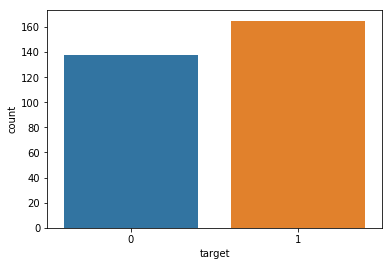

In [94]:
print(db.groupby('target').size())
sns.countplot(db['target'], label = 'count')
plt.show()

In [95]:
wod = len(db[db.target == 0])
wd = len(db[db.target == 1])
tp = len(db.target)
print('Percentage of patients without disease: {:.2f}%'.format((wod/tp * 100)))
print('Percentage of patients with disease: {:.2f}%'.format((wd/tp * 100)))

Percentage of patients without disease: 45.54%
Percentage of patients with disease: 54.46%


sex
0     96
1    207
dtype: int64


Text(0.5, 0, 'Sex (0 = Female, 1 = male)')

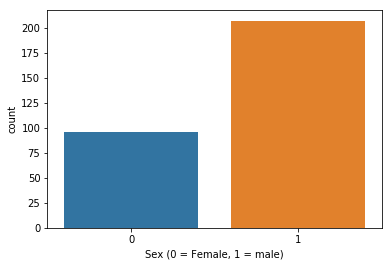

In [96]:
print(db.groupby('sex').size())
sns.countplot(db['sex'], label = 'count')
plt.xlabel('Sex (0 = Female, 1 = male)')

In [97]:
cf = len(db[db.sex == 0])
cm = len(db[db.sex == 1])
ts = len(db.sex)
print('Percentage of female patients: {:.2f}%'.format((cf/ts * 100)))
print('Percentage of male patients: {:.2f}%'.format((cm/ts * 100)))

Percentage of female patients: 31.68%
Percentage of male patients: 68.32%


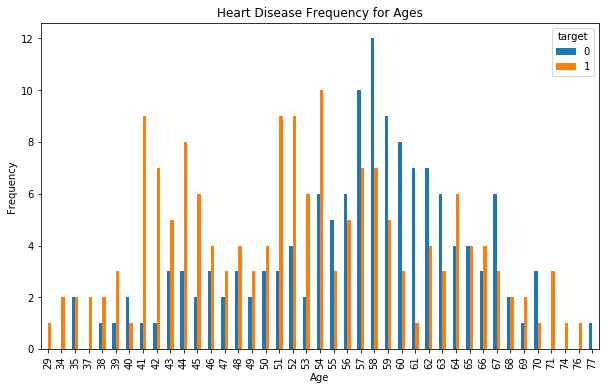

In [98]:
pd.crosstab(db.age,db.target).plot(kind = 'bar', figsize=(10,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

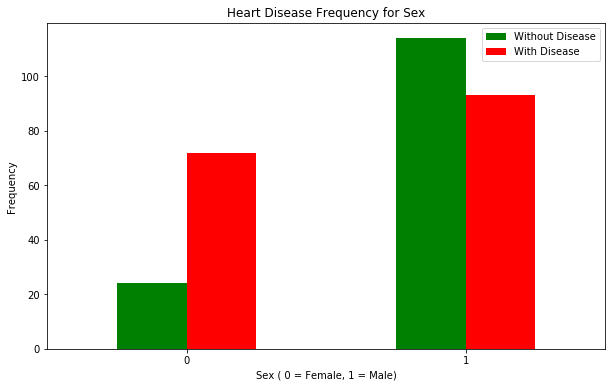

In [99]:
pd.crosstab(db.sex,db.target).plot(kind = 'bar', figsize = (10,6), color = ['green', 'red'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex ( 0 = Female, 1 = Male)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(['Without Disease', 'With Disease'])
plt.show()

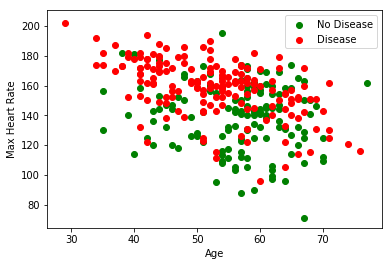

In [100]:
plt.scatter(x = db.age[db.target == 0], y = db.thalach[(db.target == 0)], c = 'green')
plt.scatter(x = db.age[db.target == 1], y = db.thalach[(db.target == 1)], c = 'red')
plt.legend(['No Disease', 'Disease'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

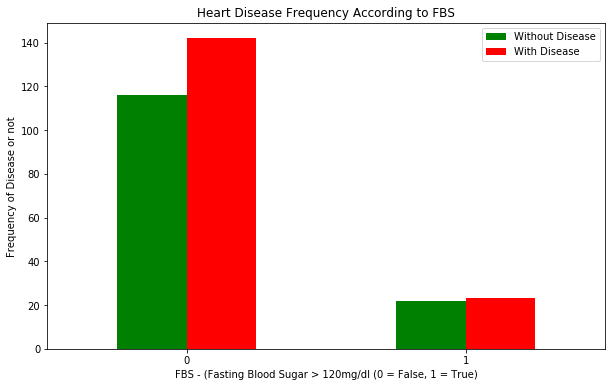

In [101]:
pd.crosstab(db.fbs, db.target).plot(kind = 'bar', figsize = (10,6), color = ['green', 'red'])
plt.title('Heart Disease Frequency According to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120mg/dl (0 = False, 1 = True)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or not')
plt.legend(['Without Disease', 'With Disease'])
plt.show()

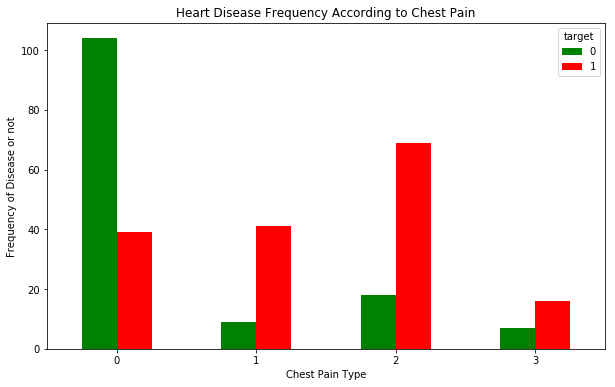

In [102]:
pd.crosstab(db.cp, db.target).plot(kind = 'bar', figsize = (10,6), color = ['green', 'red'])
plt.title('Heart Disease Frequency According to Chest Pain')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or not')
plt.show()

In [103]:
Acclist = []
y = db.target
x = db.drop('target', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
lr = LogisticRegression(C=1).fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(lr.score(x_train, y_train)*100))
print('Test accuracy: {:.3f}'.format(lr.score(x_test, y_test)*100))
p = lr.score(x_test, y_test)*100
p1 = round(p, 2)
Acclist.append(p1)

Training accuracy: 85.124
Test accuracy: 88.525


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(svm.score(x_train, y_train)*100))
print('Test accuracy: {:.3f}'.format(svm.score(x_test, y_test)*100))

Training accuracy: 100.000
Test accuracy: 65.574


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [105]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

svs = SVC(C=1)
svs.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svs.score(x_train_scaled, y_train)*100))
print("Accuracy on test set: {:.3f}".format(svs.score(x_test_scaled, y_test)*100))
p = svs.score(x_test_scaled, y_test)*100
p1 = round(p, 2)
Acclist.append(p1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Accuracy on training set: 80.579
Accuracy on test set: 86.885


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [106]:
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(nb.score(x_train_scaled, y_train)*100))
print("Accuracy on test set: {:.3f}".format(nb.score(x_test_scaled, y_test)*100))
p = nb.score(x_test_scaled, y_test)*100
p1 = round(p, 2)
Acclist.append(p1)

Accuracy on training set: 83.884
Accuracy on test set: 83.607


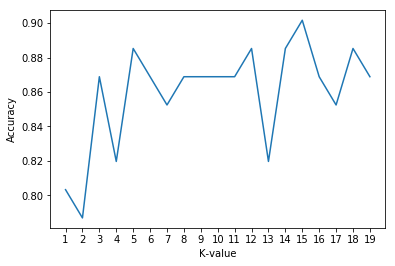

Maximum KNN Accuracy is: 90.16%


In [107]:
scoretest=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled, y_train)
    scoretest.append(knn.score(x_test_scaled, y_test))

plt.plot(range(1, 20), scoretest)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

print('Maximum KNN Accuracy is: {:.2f}%'.format((max(scoretest))*100))
p = max(scoretest)*100
p1 = round(p,2)
Acclist.append(p1)

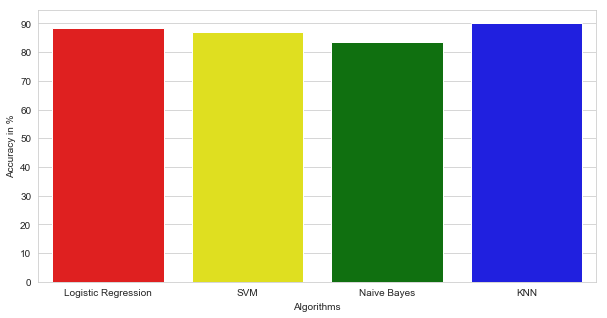

In [116]:
Algos = ['Logistic Regression', 'SVM', 'Naive Bayes', 'KNN']
colors = ['red', 'yellow', 'green', 'blue']

sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel('Accuracy in %')
plt.xlabel('Algorithms')
sns.barplot(x = Algos, y = Acclist, palette = colors)
plt.show()